In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../input/heart.csv')

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.rename(columns={'cp':'chest_pain','chol':'cholesterol','restecg':'resting_ecg','trestbps':'resting_blood_pressure',
                   'fbs':'fasting_blood_sugar','thalach':'max_heart_rate','exang':'exercise_induced_angina','oldpeak':
          'st_depression','thal':'thalassemia','ca':'num_major_vessels'},inplace=True)

In [5]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
slope                      0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain                 303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
resting_ecg                303 non-null int64
max_heart_rate             303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
slope                      303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

Text(0, 0.5, 'Counter')

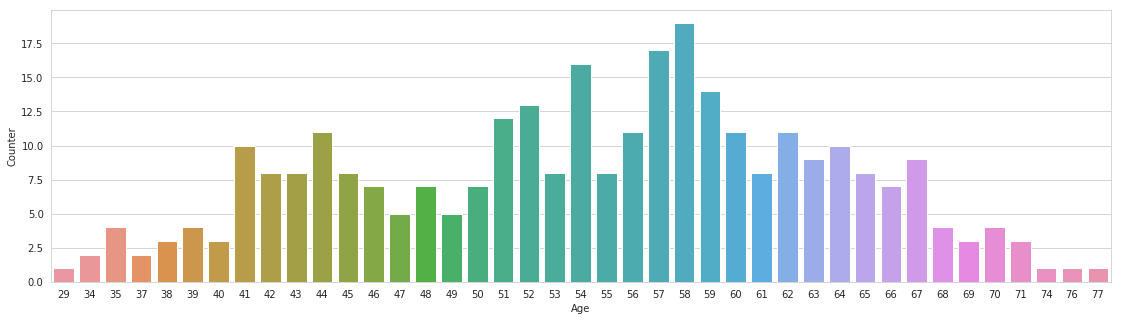

In [10]:
plt.figure(figsize=(19,5))
sns.barplot(x=df.age.value_counts().index,y=df.age.value_counts().values)
plt.xlabel("Age")
plt.ylabel("Counter")

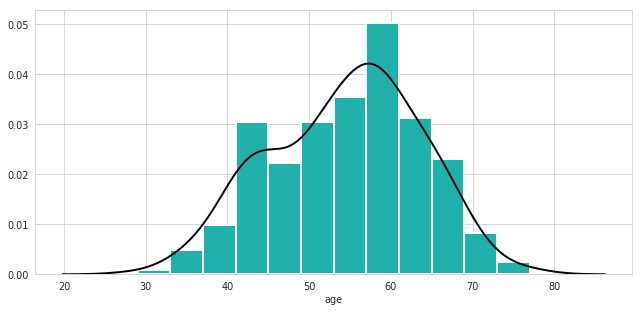

In [11]:
plt.figure(figsize=(11,5),dpi = 70)
sns.distplot(df['age'],color='lightseagreen',hist_kws={'alpha':1,"linewidth": 2}, kde_kws={"color": "k", "lw": 2})
plt.show()

In [12]:
print("Total number of Females :",len(df[df.sex==0]))
print("Total number of Males :",len(df[df.sex==1]))

Total number of Females : 96
Total number of Males : 207


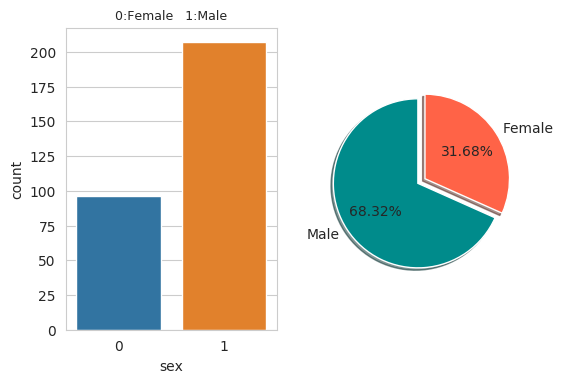

In [13]:
plt.figure(dpi=100)
plt.subplot(1,2,1)
plt.title('0:Female   1:Male',fontdict={'fontsize':9})
sns.countplot(df.sex)
plt.subplot(1,2,2)
plt.pie(df.sex.value_counts(),autopct='%.2f%%',explode=[0.1,0],shadow=True,labels=['Male','Female'],startangle=90,
        colors=['darkcyan','tomato'])
plt.show()

In [14]:
print("Total number of person infected with Heart Disease:",len(df[df.target==1]))
print("Total number of person without Heart Disease :",len(df[df.target==0]))

Total number of person infected with Heart Disease: 165
Total number of person without Heart Disease : 138


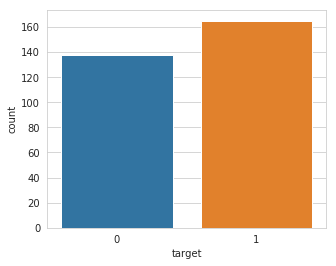

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(df.target)

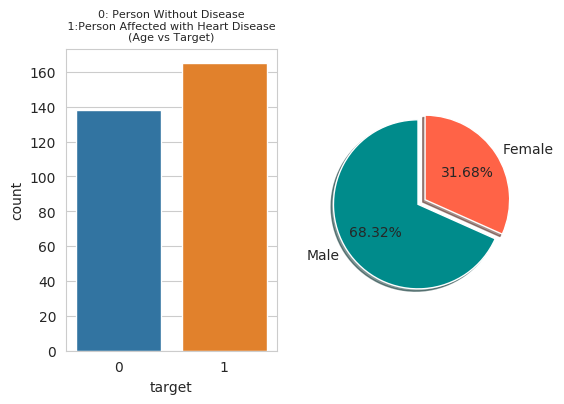

In [16]:
plt.figure(dpi=100)
plt.subplot(1,2,1)
plt.title("0: Person Without Disease\n 1:Person Affected with Heart Disease \n(Age vs Target)",fontdict={'fontsize':8})
sns.countplot(df.target)
plt.subplot(1,2,2)
plt.pie(df.sex.value_counts(),autopct='%.2f%%',explode=[0.1,0],shadow=True,labels=['Male','Female'],startangle=90,
        colors=['darkcyan','tomato'])
plt.show()

In [17]:
chest_type=['Typical Angina','Atypical Angina', 'Non-Anginal Pain','Asymptomatic']
for types,counts in zip(chest_type,df.chest_pain.value_counts()):
    print('Number of Person with Chest Pain Type "{}" are: {}'.format(types,counts))

Number of Person with Chest Pain Type "Typical Angina" are: 143
Number of Person with Chest Pain Type "Atypical Angina" are: 87
Number of Person with Chest Pain Type "Non-Anginal Pain" are: 50
Number of Person with Chest Pain Type "Asymptomatic" are: 23


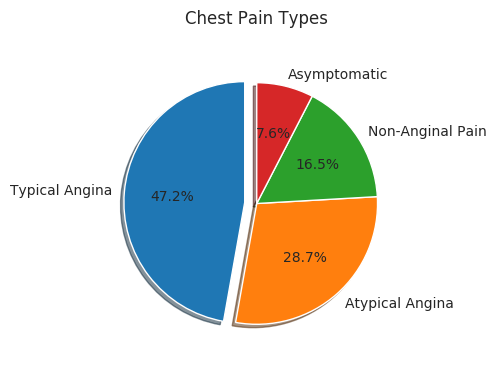

In [18]:
plt.figure(dpi=100)
plt.pie(df.chest_pain.value_counts().values,labels=chest_type,autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0],startangle=90)
plt.title('Chest Pain Types\n')
plt.show()

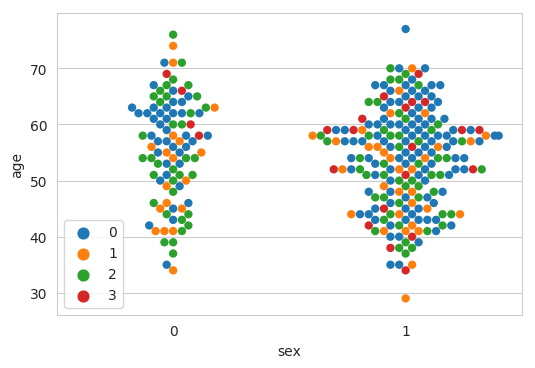

In [19]:
plt.figure(dpi=100)
sns.swarmplot(df.sex,df.age,hue=df.chest_pain,edgecolor='black',s=6)
plt.legend(loc=3)
plt.show()

**Age vs Sex**

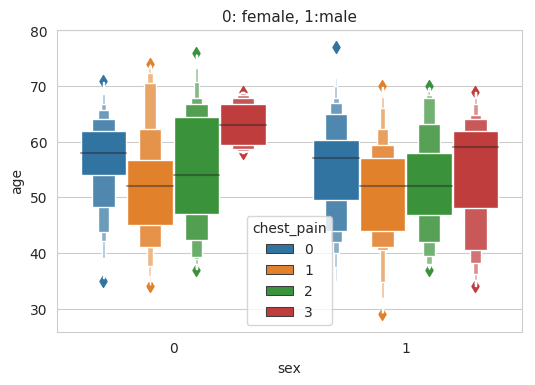

In [20]:
plt.figure(dpi=100)
sns.boxenplot(x=df.sex,y=df.age,hue=df.chest_pain)
plt.title("0: female, 1:male",fontdict={'fontsize':11})
plt.show()

**Age vs Cholesterol**

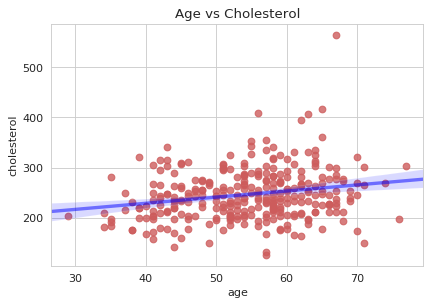

In [21]:
plt.figure(dpi=80)
sns.regplot(x=df.age,y=df.cholesterol,color='indianred',line_kws={"color":"b","alpha":0.5,"lw":3})
plt.title('Age vs Cholesterol')
plt.show()

**Age vs Maximum Heart Rate**


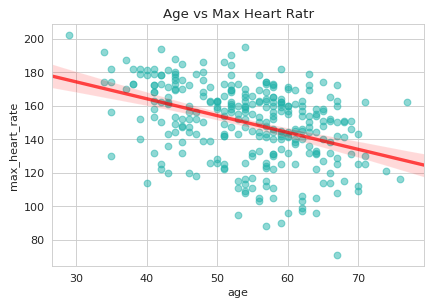

In [22]:
plt.figure(dpi=80)
sns.regplot(x=df.age,y=df.max_heart_rate,color='lightseagreen',line_kws={"color":"r","alpha":0.7,"lw":3},scatter_kws={'alpha':0.5})
plt.title('Age vs Max Heart Ratr')
plt.show()

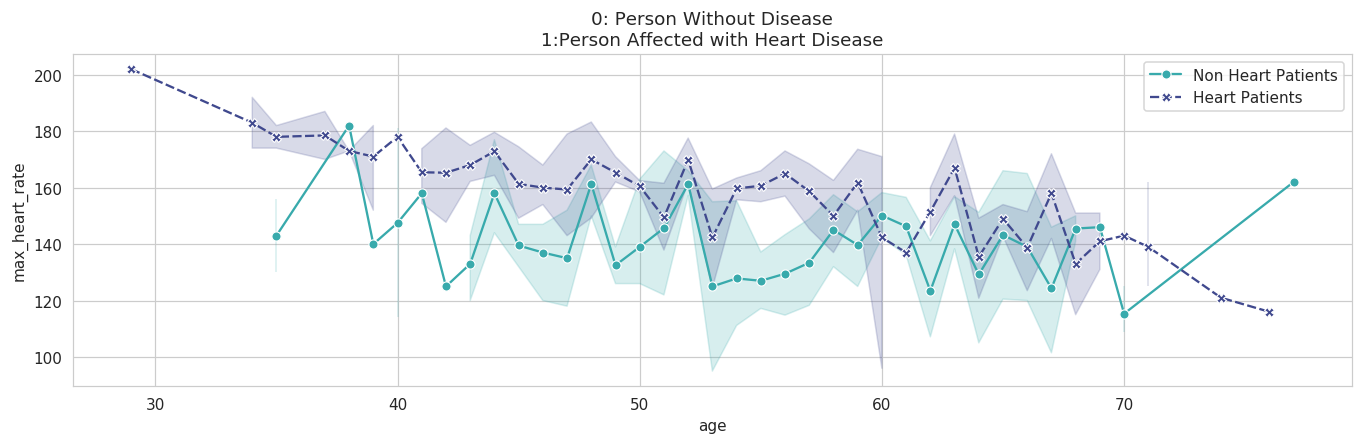

In [23]:
plt.figure(figsize=(15,4),dpi=110)
palette = sns.color_palette("mako_r", 2)
sns.lineplot(x=df.age,y=df.max_heart_rate,hue=df.target,palette=palette,markers=True,style=df.target)
plt.legend(['Non Heart Patients','Heart Patients'],loc=1)
plt.title("0: Person Without Disease\n 1:Person Affected with Heart Disease ")
plt.show()

**Age vs Blood Pressure**

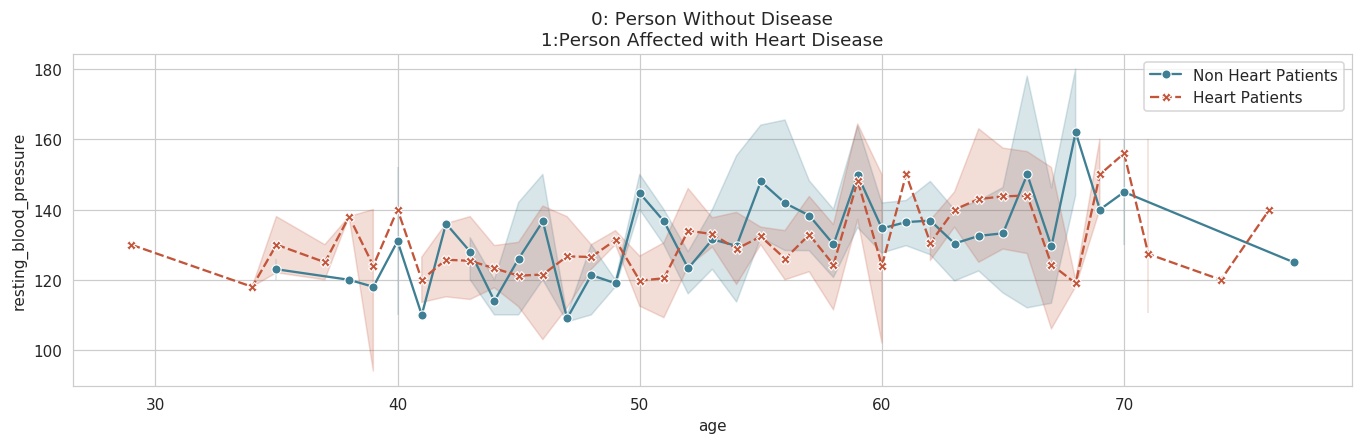

In [24]:
plt.figure(figsize=(15,4),dpi=110)
palette = sns.diverging_palette(220, 20, n=2)
sns.lineplot(x=df.age,y=df.resting_blood_pressure,hue=df.target,palette=palette,markers=True,style=df.target)
plt.legend(['Non Heart Patients','Heart Patients'],loc=1)
plt.title("0: Person Without Disease\n 1:Person Affected with Heart Disease ")
plt.show()

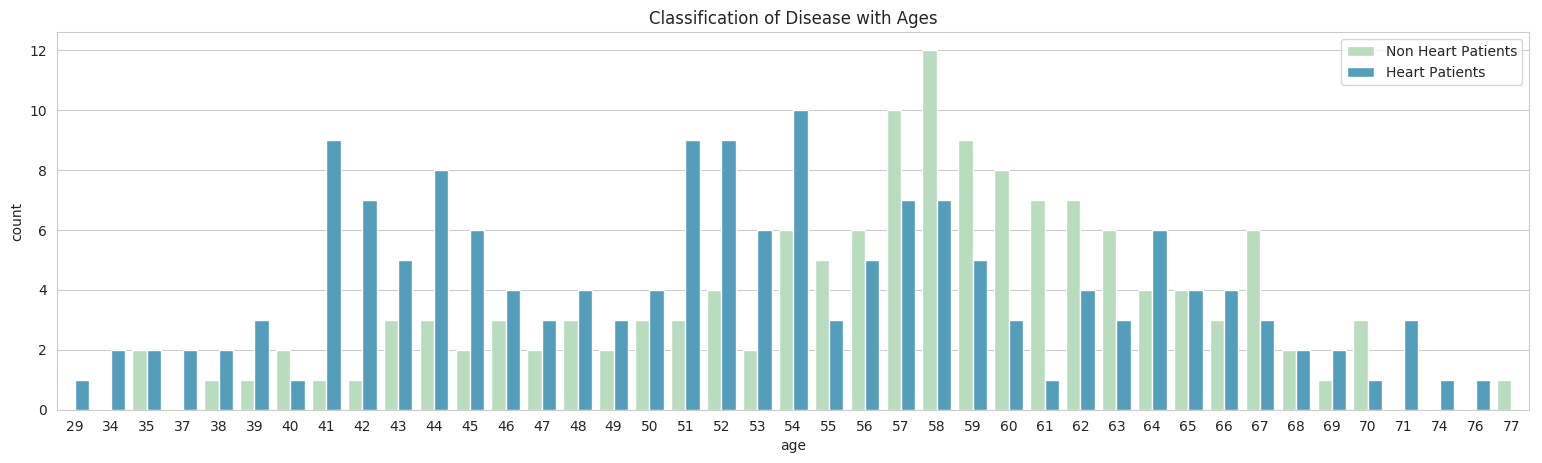

In [25]:
plt.figure(figsize=(19,5),dpi=100)
sns.countplot(df.age,data=df,hue='target',palette='GnBu')
plt.legend(['Non Heart Patients','Heart Patients'],loc=1)
plt.title('Classification of Disease with Ages')
plt.show()

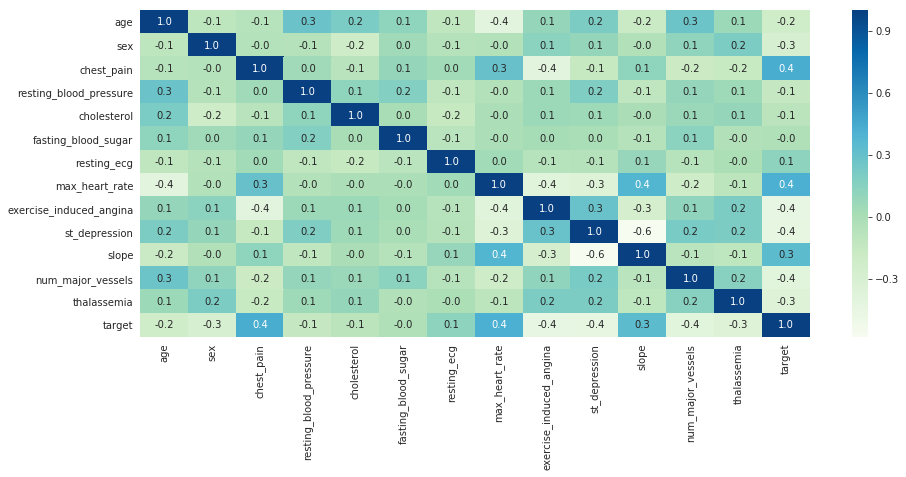

In [26]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap='GnBu')
plt.show()

In [27]:
df['sex']=df['sex'].astype('category')
df['chest_pain']=df['chest_pain'].astype('category')
df['fasting_blood_sugar']=df['fasting_blood_sugar'].astype('category')
df['resting_ecg']=df['resting_ecg'].astype('category')
df['exercise_induced_angina']=df['exercise_induced_angina'].astype('category')
df['slope']=df['slope'].astype('category')
df['num_major_vessels']=df['num_major_vessels'].astype('category')
df['thalassemia']=df['thalassemia'].astype('category')
df['target']=df['target'].astype('category')

In [28]:
y = df.target

In [29]:
x = pd.get_dummies(df.iloc[:,:-1],drop_first=True)

In [30]:

x.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,sex_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,resting_ecg_1,resting_ecg_2,exercise_induced_angina_1,slope_1,slope_2,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [32]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(227, 22) (227,) (76, 22) (76,)


In [33]:
classifiers=[['Logistic Regression :',LogisticRegression()],
             ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier(n_estimators=10)],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC(kernel='linear')],
       ['Gaussian Naive Bayes :',GaussianNB()],
            ['XGBoost :',XGBClassifier()]]

for name,model in classifiers:
    model=model
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print(name,'Test score is',accuracy_score(y_test,predictions)*100,'and',end =' ',sep= ' ')
    print('Training score is',accuracy_score(y_train,model.predict(x_train))*100)

Logistic Regression : Test score is 88.1578947368421 and Training score is 87.66519823788546
Decision Tree Classification : Test score is 67.10526315789474 and Training score is 100.0
Random Forest Classification : Test score is 72.36842105263158 and Training score is 99.11894273127754
Gradient Boosting Classification : Test score is 81.57894736842105 and Training score is 100.0
Ada Boosting Classification : Test score is 85.52631578947368 and Training score is 92.95154185022027
Extra Tree Classification : Test score is 78.94736842105263 and Training score is 100.0
K-Neighbors Classification : Test score is 75.0 and Training score is 74.8898678414097
Support Vector Classification : Test score is 89.47368421052632 and Training score is 86.34361233480176
Gaussian Naive Bayes : Test score is 78.94736842105263 and Training score is 81.4977973568282
XGBoost : Test score is 78.94736842105263 and Training score is 98.6784140969163


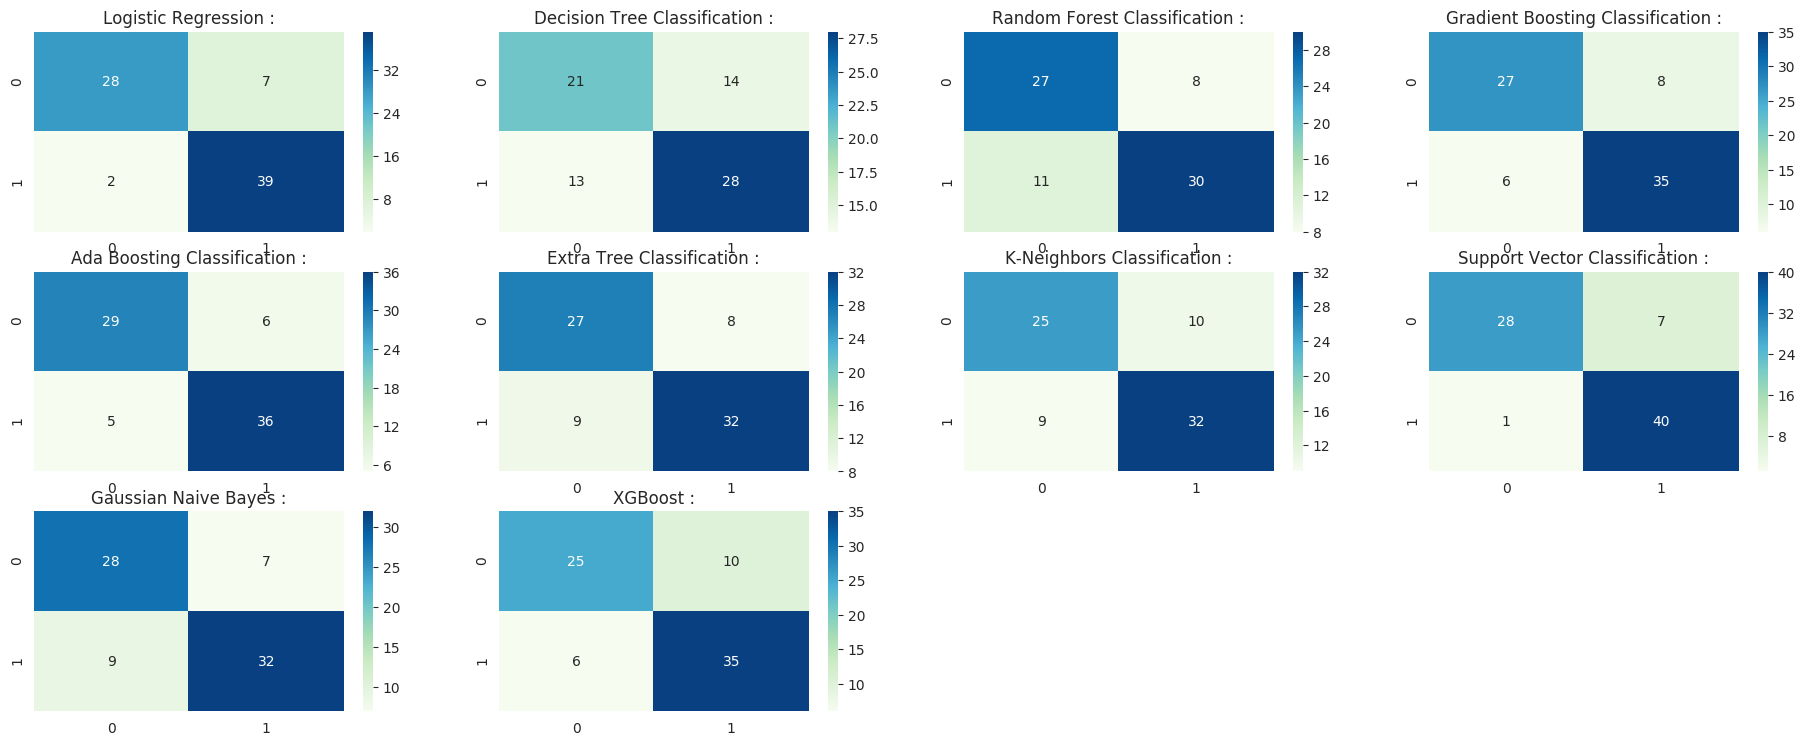

In [34]:
classifier=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=10),
            GradientBoostingClassifier(),AdaBoostClassifier(),
             ExtraTreesClassifier(),KNeighborsClassifier(),SVC(kernel='linear'),GaussianNB(),XGBClassifier()]
plt.figure(figsize=(23,9),dpi=100)
for model,j in zip(classifier,range(len(classifier))):
    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    plt.subplot(3,4,j+1)
    plt.title(classifiers[j][0])
    sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='GnBu')

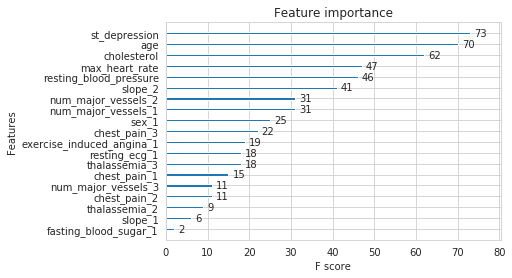

In [35]:
# Feature importance Visualisation 
model =XGBClassifier()
model.fit(x_train,y_train)
plot_importance(model)

In [36]:
cross_val_score(LogisticRegression(penalty='l1'),x_train,y_train,cv=ShuffleSplit(n_splits=5,test_size=0.2)).mean()

0.817391304347826

<h1>**Logistic Regression Possess Best Accuracy Among all Models **

In [37]:
print(round(accuracy_score(y_test,LogisticRegression(penalty='l2').fit(x_train,y_train).predict(x_test))*100,2),'%')

88.16 %
